In [1]:
import pandas as pd
import numpy as np

# Reading the indigo tweets data
IndigoTweets=pd.read_csv('Tweets.csv', encoding='latin')
print(IndigoTweets.shape)
IndigoTweets.head(10)

(14639, 1)


,Tweets
0,What @dhepburn said.
1,plus you've added commercials to the experien...
2,I didn't today... Must mean I need to take an...
3,"it's really aggressive to blast obnoxious ""en..."
4,and it's a really big bad thing about it
5,"yes, nearly every time I fly VX this âear w..."
6,Really missed a prime opportunity for Men Wit...
7,"Well, I didn'tâ¦but NOW I DO! :-D"
8,"it was amazing, and arrived an hour early. Yo..."
9,did you know that suicide is the second leadi...


In [2]:
!pip install transformers

     |████████████████████████████████| 3.5 MB 27.1 MB/s 
     |████████████████████████████████| 895 kB 50.1 MB/s 
     |████████████████████████████████| 6.8 MB 55.9 MB/s 
     |████████████████████████████████| 596 kB 60.9 MB/s 
     |████████████████████████████████| 67 kB 6.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [3]:
# importing the pipeline module
from transformers import pipeline

# Downloading the sentiment analysis model
SentimentClassifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [4]:
# Calling the sentiment analysis function for 3 sentences
SentimentClassifier(["I hope we get all these concepts! Its killing the neurons of our brain",
                     "We had a nice experience in this trip",
                     "Houston we have a problem"
                      ])

[{'label': 'NEGATIVE', 'score': 0.9997034668922424},
 {'label': 'POSITIVE', 'score': 0.9998235106468201},
 {'label': 'NEGATIVE', 'score': 0.9944382905960083}]

In [5]:
# Defining a function to call for the whole dataframe
def FunctionBERTSentiment(inpText):
  return(SentimentClassifier(inpText)[0]['label'])

# Calling the function
FunctionBERTSentiment(inpText="Houston we have a problem")

'NEGATIVE'

In [6]:
# Calling BERT based sentiment score function for every tweet
IndigoTweets['Sentiment']=IndigoTweets['Tweets'].apply(FunctionBERTSentiment)
IndigoTweets.head(10)

,Tweets,Sentiment
0,What @dhepburn said.,POSITIVE
1,plus you've added commercials to the experien...,POSITIVE
2,I didn't today... Must mean I need to take an...,NEGATIVE
3,"it's really aggressive to blast obnoxious ""en...",NEGATIVE
4,and it's a really big bad thing about it,NEGATIVE
5,"yes, nearly every time I fly VX this âear w...",NEGATIVE
6,Really missed a prime opportunity for Men Wit...,NEGATIVE
7,"Well, I didn'tâ¦but NOW I DO! :-D",NEGATIVE
8,"it was amazing, and arrived an hour early. Yo...",POSITIVE
9,did you know that suicide is the second leadi...,NEGATIVE


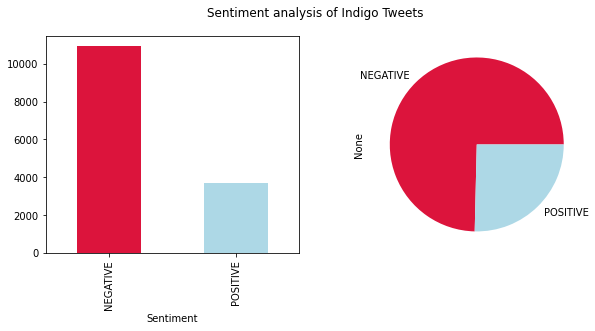

In [7]:
# Visualizing the overall sentiment distribution
import matplotlib.pyplot as plt
fig, subPlot =plt.subplots(nrows=1, ncols=2, figsize=(10,4))
fig.suptitle("Sentiment analysis of Indigo Tweets")

# Grouping the data
GroupedData=IndigoTweets.groupby('Sentiment').size()

# Creating the charts
GroupedData.plot(kind='bar', ax=subPlot[0], color=['crimson', 'lightblue'])
GroupedData.plot(kind='pie', ax=subPlot[1], colors=['crimson', 'lightblue'])